In [36]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [37]:
warnings.filterwarnings(action='once')

In [38]:
data=pd.read_csv("C:/Users/naras/Downloads/cyber_breach_data.csv")

In [39]:
data.head()

,Date_Made_Public,Company,City,State,Type_of_breach,Type_of_organization,Total_Records,Description_of_incident,Information_Source,Source_URL,Year_of_Breach,Latitude,Longitude,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,01-10-2007,George Mason University,Fairfax,Virginia,HACK,EDU,"32,000","Names, photos, and Social Security numbers of ...",Dataloss DB,NaN,2007,38.846224,-77.306373,NaN,NaN,NaN
1,1-18-2007,"University of California, San Diego",San Diego,California,HACK,EDU,"3,500",A hacker breached the security of two Universi...,Dataloss DB,NaN,2007,32.715329,-117.157255,NaN,NaN,NaN
2,1-22-2007,University of Northern Colorado,Greeley,Colorado,PORT,EDU,"15,790",A hard drive was lost or stolen. It contained ...,Dataloss DB,NaN,2007,40.423314,-104.709132,NaN,NaN,NaN
3,02-12-2007,Science Applications International Corp. (SAIC),San Diego,California,STAT,BSO,"45,000",On January 25 thieves broke \n into...,Dataloss DB,NaN,2007,32.715329,-117.157255,NaN,NaN,NaN
4,2-15-2007,ChoicePoint,Alpharetta,Georgia,INSD,BSO,"1,63,000",Fraudsters who presented themselves as legitim...,Security Breach Letter,NaN,2007,34.075376,-84.294090,NaN,NaN,NaN


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9361 entries, 0 to 9360
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date_Made_Public         9361 non-null   object 
 1   Company                  9361 non-null   object 
 2   City                     5713 non-null   object 
 3   State                    8769 non-null   object 
 4   Type_of_breach           9361 non-null   object 
 5   Type_of_organization     9361 non-null   object 
 6   Total_Records            9356 non-null   object 
 7   Description_of_incident  9358 non-null   object 
 8   Information_Source       9308 non-null   object 
 9   Source_URL               3953 non-null   object 
 10  Year_of_Breach           9361 non-null   int64  
 11  Latitude                 9243 non-null   float64
 12  Longitude                9243 non-null   float64
 13  Unnamed: 13              0 non-null      float64
 14  Unnamed: 14             

In [41]:
data.columns

Index(['Date_Made_Public', 'Company', 'City', 'State', 'Type_of_breach',
       'Type_of_organization', 'Total_Records', 'Description_of_incident',
       'Information_Source', 'Source_URL', 'Year_of_Breach', 'Latitude',
       'Longitude', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'],
      dtype='object')

In [42]:
data.drop('Unnamed: 13',axis='columns',inplace=True)

In [43]:
data.drop('Unnamed: 14',axis='columns',inplace=True)

In [44]:
data.drop('Unnamed: 15',axis='columns',inplace=True)

In [45]:
data.columns

Index(['Date_Made_Public', 'Company', 'City', 'State', 'Type_of_breach',
       'Type_of_organization', 'Total_Records', 'Description_of_incident',
       'Information_Source', 'Source_URL', 'Year_of_Breach', 'Latitude',
       'Longitude'],
      dtype='object')

In [46]:
data.corr()

,Year_of_Breach,Latitude,Longitude
Year_of_Breach,1.000000,-0.423669,0.369857
Latitude,-0.423669,1.000000,-0.744811
Longitude,0.369857,-0.744811,1.000000


In [47]:
import seaborn as sb

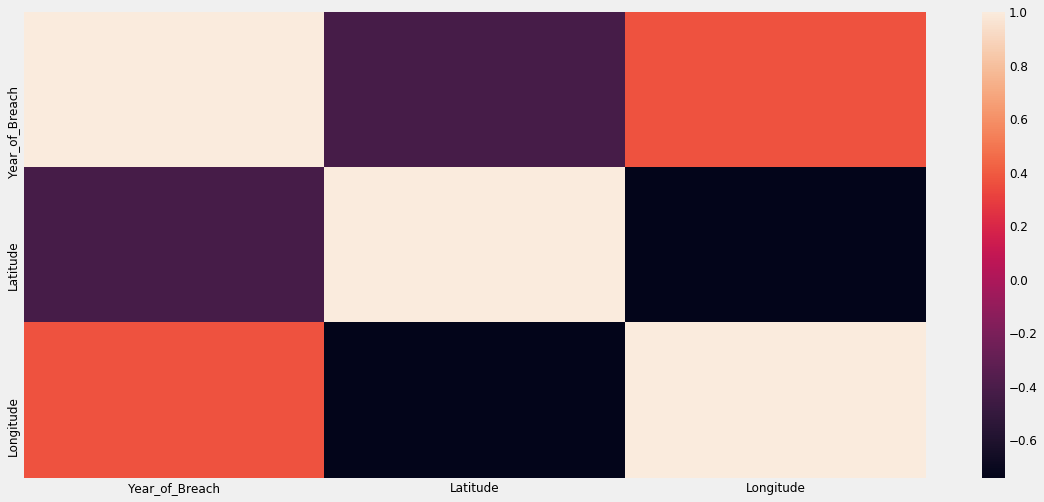

In [48]:
sb.heatmap(data.corr())

In [49]:
data['Type_of_breach'].value_counts()

HACK    2792
DISC    1869
PHYS    1776
PORT    1180
UNKN     792
INSD     608
STAT     276
CARD      68
Name: Type_of_breach, dtype: int64

In [50]:
time_series=data.loc[data['Type_of_breach'] == "HACK", ["Date_Made_Public","Total_Records","Type_of_breach"]]
time_series = time_series.dropna(subset=["Date_Made_Public"])
time_series["Total_Records"]=time_series["Total_Records"].str.replace(",","")
time_series["Total_Records"] = pd.to_numeric(time_series["Total_Records"], errors='coerce')
drop_indices=time_series["Total_Records"][time_series["Total_Records"]>30000].index
drop_index=time_series["Total_Records"][time_series["Total_Records"]==0].index
time_series=time_series.drop(drop_indices)
time_series=time_series.drop(drop_index)
time_series.index=range(1406)

In [51]:
time_series = time_series.groupby('Date_Made_Public')['Total_Records'].sum().reset_index()
time_series = time_series.set_index('Date_Made_Public')
time_series.index = pd.to_datetime(time_series.index)
time_series.index

DatetimeIndex(['2012-01-01', '2016-01-02', '2020-01-02', '2019-01-03',
               '2020-01-03', '2018-01-04', '2017-01-05', '2020-01-05',
               '2012-01-06', '2013-01-06',
               ...
               '2018-09-26', '2019-09-26', '2012-09-27', '2018-09-27',
               '2019-09-27', '2007-09-29', '2008-09-29', '2018-09-29',
               '2019-09-29', '2010-09-30'],
              dtype='datetime64[ns]', name='Date_Made_Public', length=978, freq=None)

In [52]:
y = time_series['Total_Records'].resample('MS').mean()

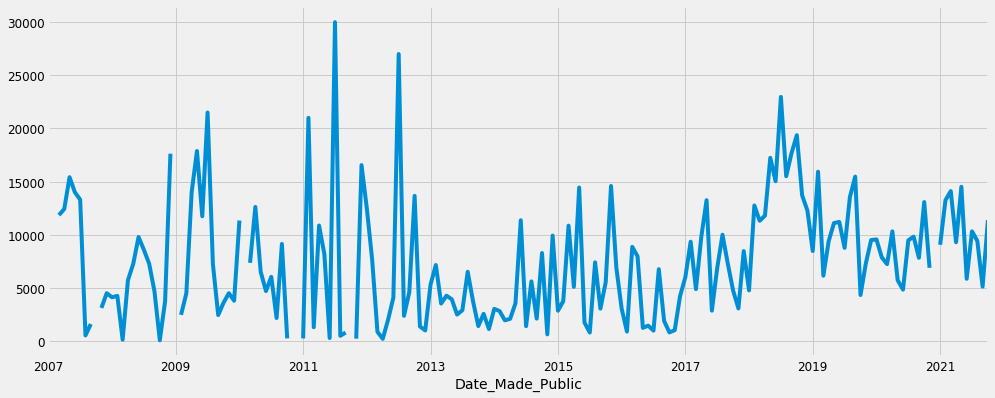

In [53]:
y.plot(figsize=(15, 6))
plt.show()

In [54]:
y=y.dropna()

C:\Users\naras\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


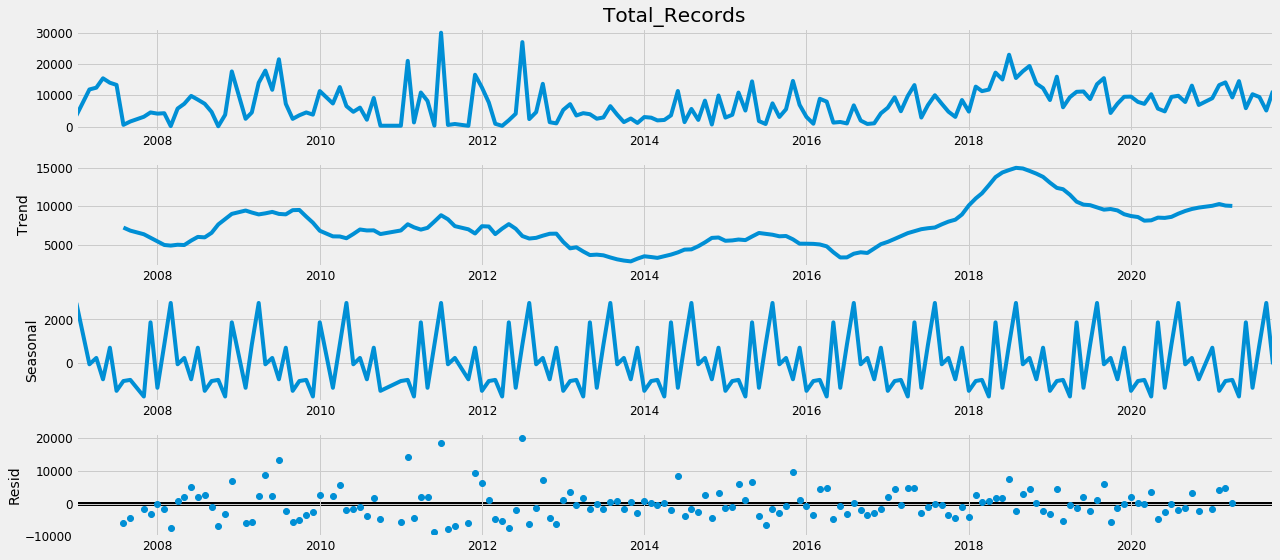

In [55]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y,freq=12, model='additive')
fig = decomposition.plot()
plt.show()

In [56]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [57]:
train_data = y['2014':'2018']
test_data = y['2019':'2021']

In [58]:
AIC=[]
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            #print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

C:\Users\naras\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3571.864839877865
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3283.3125398448046
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3264.796590326384
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2953.721988598105
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3257.261380886802
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3196.1424879610167
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2999.5067196704777
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2955.4826097417126
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3497.162797414403
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3242.0899486465073
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3245.6895071125846
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2942.4063161469985
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3271.313278458838
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3210.80063823625
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3004.499621807257
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2944.2281653839937
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3456.7955251590192
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3216.220753603032
AR

In [59]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is 2920.4981079526224 for model SARIMAX(0, 1, 1)x(0, 1, 1, 12)


In [60]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

In [61]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                      Total_Records   No. Observations:                  170
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1457.249
Date:                            Thu, 06 Jan 2022   AIC                           2920.498
Time:                                    23:32:28   BIC                           2929.387
Sample:                                         0   HQIC                          2924.110
                                            - 170                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8500      0.115     -7.411      0.000      -1.075      -0.625
ma.S.L12      -1.0052      0.126     -8.004      0.000      -1.251      -0.759
sigma2      7.306e+07   3.64e-10      2e+17      0.000    7.31e+07    7.31e+07
===================================================================================
Ljung-Box (Q):                       29.53   Jarque-Bera (JB):                79.69
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                             1.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.59e+33. Standard errors may be unstable.
"""

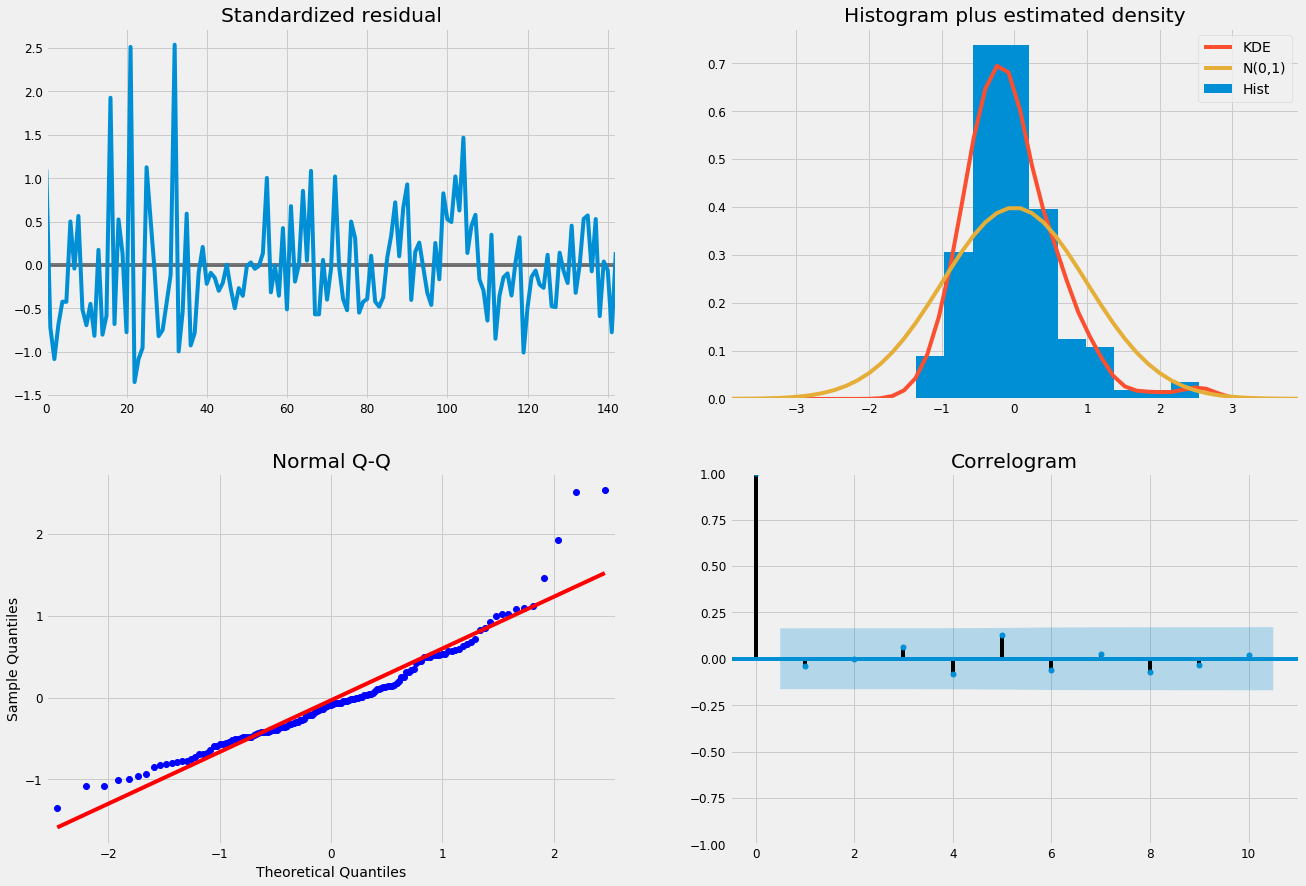

In [62]:
results.plot_diagnostics(figsize=(20, 14))
plt.show()

In [63]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()

In [64]:
m=results.predict(start=pd.to_datetime("2019-01-01"),end=pd.to_datetime("2021-10-01"))
m

Date_Made_Public
2019-01-01    14034.632405
2019-02-01    12923.098320
2019-03-01    13527.514512
2019-04-01    12480.268427
2019-05-01    12349.142130
2019-06-01    12055.154084
2019-07-01    11822.525762
2019-08-01    13285.129085
2019-09-01    12704.583780
2019-10-01    13089.624417
2019-11-01    11533.690999
2019-12-01    10707.603190
2020-01-01    10127.325511
2020-02-01     9837.742437
2020-03-01     9526.376528
2020-04-01     9312.033150
2020-05-01     9848.334768
2020-06-01     9057.242572
2020-07-01     8256.413312
2020-08-01    10434.900573
2020-09-01     9649.999260
2020-10-01     9158.304384
2020-11-01     9675.571319
2021-01-01     9065.693423
2021-02-01     8660.230511
2021-03-01     9172.117759
2021-04-01     9937.608138
2021-05-01     9936.584508
2021-06-01    10970.553070
2021-07-01     9980.967657
2021-08-01     9957.792503
2021-09-01    11845.083304
2021-10-01    10095.056107
dtype: float64

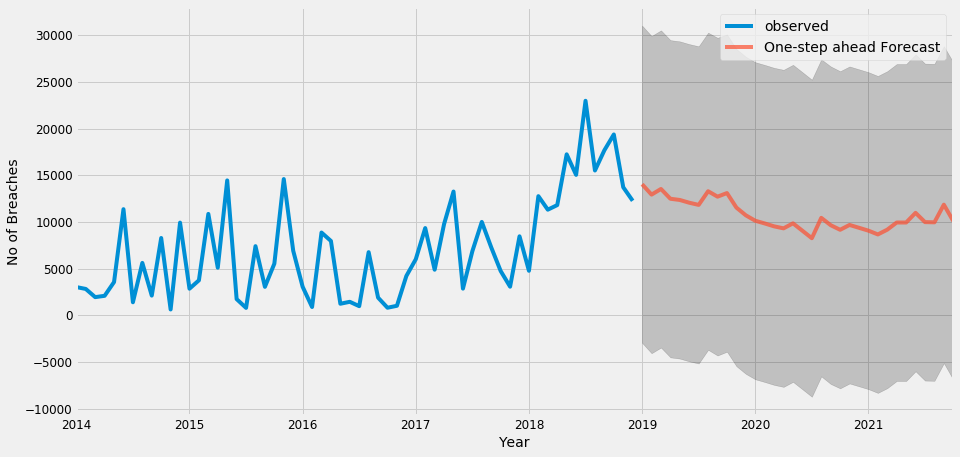

In [30]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = train_data.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Year')
ax.set_ylabel('No of Breaches')
plt.legend()
plt.show()

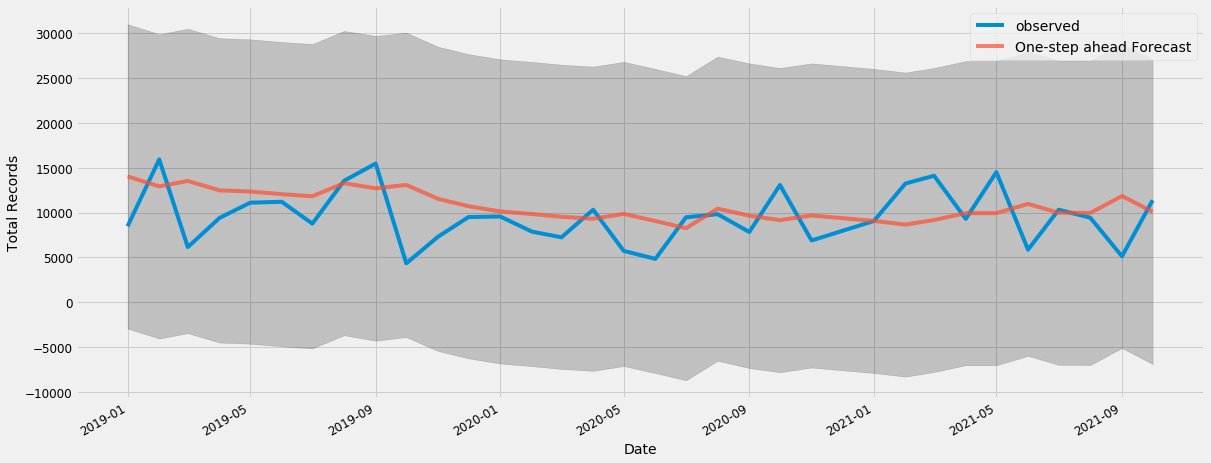

In [31]:
ax = y['2019':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Total Records')
plt.legend()

plt.show()

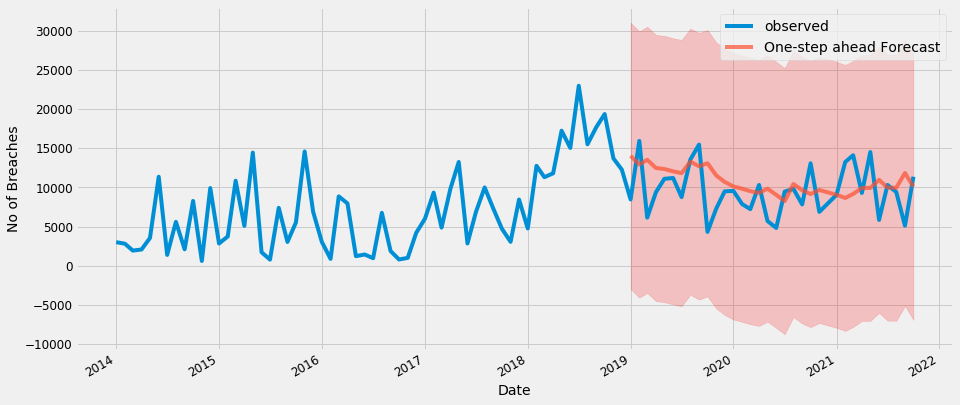

In [32]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2014':'2022'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='red', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('No of Breaches')
plt.legend()
plt.show()

In [33]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()

In [34]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 3622.87


In [35]:
mean_error=(y_forecasted-y_truth).sum()/len(y_truth)
print('Mean Error:',mean_error)

Mean Error: 1178.593202657025
